# Introduction to Tensorflow Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating Dataset

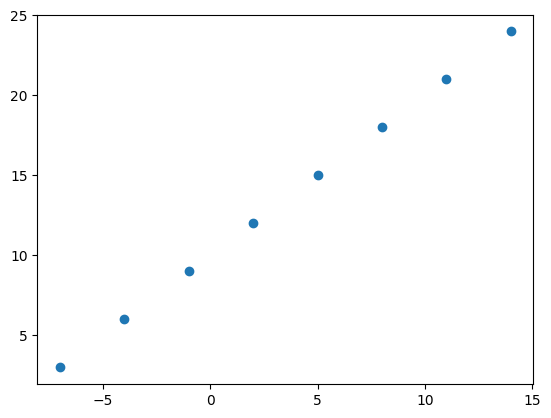

In [2]:
# Create features
X = np.arange(-7,15,3,dtype=np.float16)

# Create labels
y = np.arange(3,25,3,dtype=np.float16)

# Visualize
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Input and Output Shapes
X.shape, y.shape

((8,), (8,))

In [5]:
# Shape of one input element
X[0].shape

# Shape of one output element
y[0].shape

# NOTE: The shape is () since we are dealing with tensors

()

In [6]:
# Scalars have dimension 0
X[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

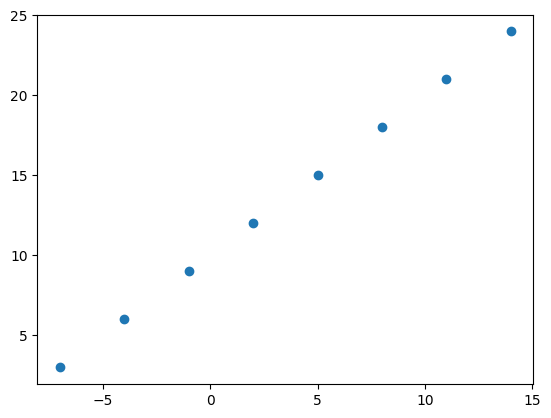

In [9]:
plt.scatter(X,y)

### Modelling with TF  - Experiment, Experiment, Experiment
1. Creating a model - define input and output layers, and the hidde layers of the NN
2. Compiling the model - Define the loss functions, optimizer and evaluation metrics
3. Fitting the model - Letting the model find the patterns between X & y (Features and labels)

Method 1:
- Add layers after creating a model from Sequential class

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with Sequential
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 20.2370 - mae: 20.2370
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 19.9558 - mae: 19.9558
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 19.6745 - mae: 19.6745
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 19.3933 - mae: 19.3933
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 19.1120 - mae: 19.1120
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 18.8308 - mae: 18.8308
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 18.5495 - mae: 18.5495
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 18.2683 - mae: 18.2683
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 17.9870 - mae: 17.9870
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 17.7058 - mae: 17.7058


Method 2:
- Add the layers in the Sequential API while creating the model itself

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,)) # It is 1, since we pass only 1 data pt
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 162ms/step - loss: 13.6343 - mae: 13.6343
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 13.5018 - mae: 13.5018
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 13.3693 - mae: 13.3693
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 13.2368 - mae: 13.2368
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 13.1043 - mae: 13.1043
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 12.9718 - mae: 12.9718
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 12.8393 - mae: 12.8393
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 12.7068 - mae: 12.7068
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 12.5743 - mae: 12.5743
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 12.4418 - mae: 12.4418


#### Predict using the trained Model

In [12]:
model_1.predict([17.0]), model_2.predict([17.0])

1/1 [==============================] - 0s 39ms/step


(array([[-15.243748]], dtype=float32), array([[5.3977523]], dtype=float32))

### Improving the Model
- We can improve our model by modifying the steps we took to create a model

1. **Creating a model** 
    - Add more layers
    - Increase the number of neurons in the layers
    - Change the activation function in a each layer
2. **Compiling a model**
    - Change the optimizer
    - Change the loss function
    - Change the *learning rate* of optimizer
3. **Fitting a model**
    - Change the number of epochs
    - Provide more data to learn from

In [13]:
# Changes: Increase number of epochs

# 1. create the model
improv_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
improv_model1.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 181ms/step - loss: 8.9762 - mae: 8.9762
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8437 - mae: 8.8437
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7112 - mae: 8.7112
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5787 - mae: 8.5787
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4462 - mae: 8.4462
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3137 - mae: 8.3137
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1812 - mae: 8.1812
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0487 - mae: 8.0487
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9162 - mae: 7.9162
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.7837 - mae: 7.7837
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.651

In [14]:
improv_model1.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.89253]], dtype=float32)

##### `NOTE`: Common ways to better our DL model:
- Increase number of layers
- Increase anumber of neurons in each layer
- Change optimizer
- Change Learning Rate (The most hyperparam for most NN)
- Fitting on more data
- Fitting for more epochs

In [15]:
# Changes: improv1 + hidden layer with 50 layers + Cha

# 1. Create a model
improv_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model2.compile(loss = tf.losses.mae,
                        optimizer = tf.optimizers.Adam(0.01),
                        metrics = ["mae"])

# 3. Fit the model
improv_model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 11.7167 - mae: 11.7167
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0252 - mae: 11.0252
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3218 - mae: 10.3218
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6049 - mae: 9.6049
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8723 - mae: 8.8723
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1219 - mae: 8.1219
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3512 - mae: 7.3512
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9372 - mae: 6.9372
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1578 - mae: 7.1578
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4236 - mae: 7.4236
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss:

In [16]:
improv_model2.predict([17.0])

# Though our loss is lesser than before, its prediction is worse. This is due to overfitting.
# Hence, our model has trained really well on training data, but on unseen data, its results are not good

1/1 [==============================] - 0s 49ms/step


array([[26.763681]], dtype=float32)

### Evaluating a Model - Visualize, Visualize, Visualize
* Visualize the data - What is the data you are working with? How does it look?
* Visualize the model - What does our model look like?
* Training of model - How does the model look while training?
* Predictions of model - How the predictions of the model compare to the ground truth?


In [17]:
# Make a larger dataset
X = tf.range(-100,100,4)
y = X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

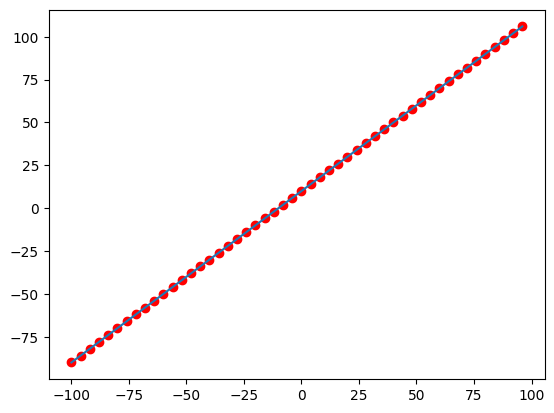

In [18]:
# Visualize the data
plt.plot(X,y)
plt.scatter(X,y,color='r')

#### The 3 datasets
> Training set
* Model learns on this data. 
* This is 70-80% of total data.
> Validation set
* Model gets tuned on this data. 
* This is 10-15% of total data.
> Test set
* Model gets evaluate on this data. 
* This is 10-15% of total data.

`We have these 3 sets to increase the model's ability to generalize`

In [19]:
len(X)

50

In [20]:
X_train = X[:40] # First 40 samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # remaining samples (20% of the data)
y_test = y[40:] 

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualizing Data

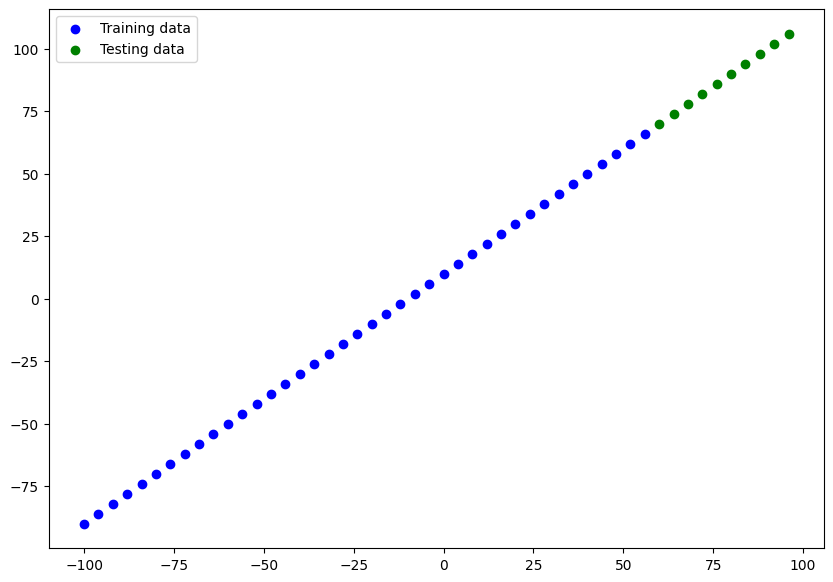

In [21]:
plt.figure(figsize=(10,7))

# Plot training data
plt.scatter(X_train, y_train, c='b', label = "Training data")

# Plot testing data
plt.scatter(X_test, y_test, c='g', label = "Testing data")

# Show legend
plt.legend()

#### Visualizing Model 
- Model Summary
- Plot_model


In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)


In [23]:
## ERROR OCCURS
# model.summary()
# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [24]:
X[0].shape

TensorShape([])

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument in first layer

tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_Layer"),
    tf.keras.layers.Dense(1, name="Output_Layer")
], name="model_3")

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)

# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [26]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total parameters - Total number of parameters in the model.
* Trainable Parameters - The parameters that the model can update
* Non-trainable parameters - The parameters that aren't updated during training (This is typical when you bring in already learned patterns and parameters from other models during **transfer learning**)

**Resources:** [MIT's Introduction to Deep Learning](https://introtodeeplearning.com/2022/index.html)

In [27]:
model.fit(X_train,y_train,epochs=100,verbose=0)

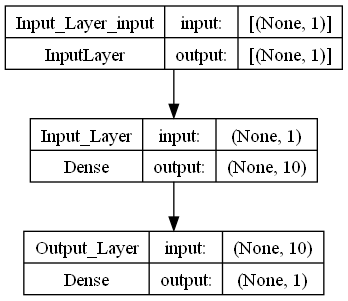

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualize Model's Predictions
- Plot the predictions (y_pred) against ground truth labels( y_train / y_test )



In [29]:
# Make predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[ 75.98556 ],
       [ 80.93418 ],
       [ 85.882805],
       [ 90.831436],
       [ 95.78005 ],
       [100.728676],
       [105.6773  ],
       [110.62592 ],
       [115.57455 ],
       [120.52317 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

Create a plotting functions

In [31]:
# Create a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """ Plots training data, test data and compares the predictions to the ground truth"""

    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data,predictions,c='r',label="Predictions")
    # Show the legend
    plt.legend()

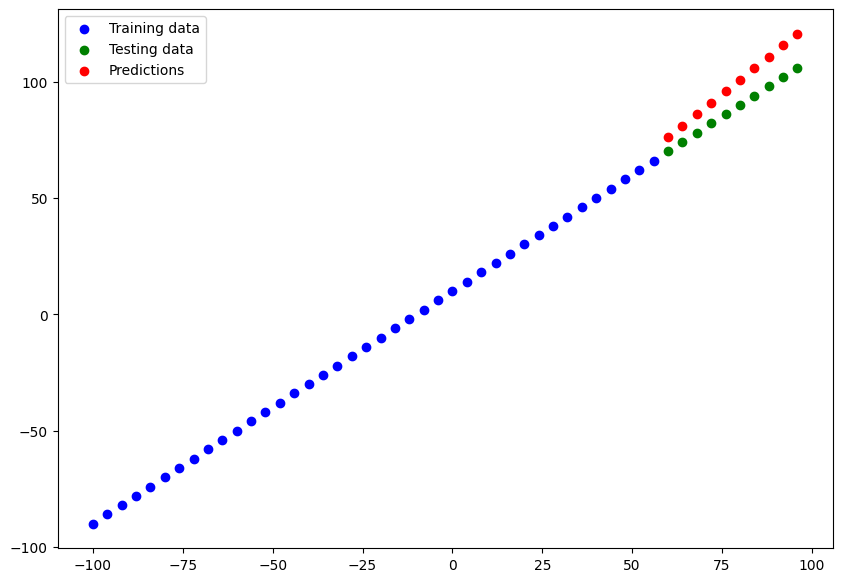

In [32]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluation Metrics for Regression Model

* MAE - Mean Absolute Error
    * Mean of absolute error
    * A starter metric for regression problems
    * Adv: It is most Robust to outliers.
    * Disadv: MAE is not differential, hence can't apply optimizers like Gradient Descent
###
* MSE - Mean Squared Error
    * Mean of squares of absolute error
    * When larger errors are more significant than smaller errors
    * Adv: MSE is differential
    * Disadv: MSE is not Robust to outliers (Outliers are penalised the most, since the deviation itself is high and we are squaring it too)
###
* Huber - Combination of MSE and MAE
    * Less sensitive to outliers than MSE
###
* RMSE - Root Mean Squared Error
    * Root of mean of squares of absolute errors
    * Adv: RMSE is differential and unit is same as output variable
    * Disadv: RMSE is not as Robust as MAE, to outliers.

In [33]:
model.evaluate(X_test,y_test)

# Metrics is MAE since metrics and loss in compiling is MAE

1/1 [==============================] - 0s 108ms/step - loss: 10.2544 - mae: 10.2544


[10.254364967346191, 10.254364967346191]

In [34]:
y_test,tf.squeeze(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 75.98556 ,  80.93418 ,  85.882805,  90.831436,  95.78005 ,
        100.728676, 105.6773  , 110.62592 , 115.57455 , 120.52317 ],
       dtype=float32)>)

In [35]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.254365>

In [36]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=112.576065>

In [37]:
# Make a function to reuse MAE and MSE

def MAE(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def MSE(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


### Experiments to Improve Models

```
Build model -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak
```
1. Get more data for model to train on, to learn patterns and relationships between features and labels

2. Build larger models (Complex models)
    * More layers and hidden units in each layer
##
3. Train for more epochs


Build 3 models:
- Model_1 -> 1 layer and 100 epochs
- Model_2 -> 2 layers and 100 epochs
- Model_3 -> 2 layers and 500 epochs

In [38]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [39]:
# Model_1  -  1 layer and 100 epochs

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 62.5088 - mae: 62.5088
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 27.6074 - mae: 27.6074
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0681 - mae: 11.0681
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4820 - mae: 9.4820
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3753 - mae: 10.3753
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6155 - mae: 9.6155
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 8.7274 - mae: 8.7274
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.0732 - mae: 9.0732
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.1140 - mae: 19.1140
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3275 - mae: 10.3275
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 35ms/step


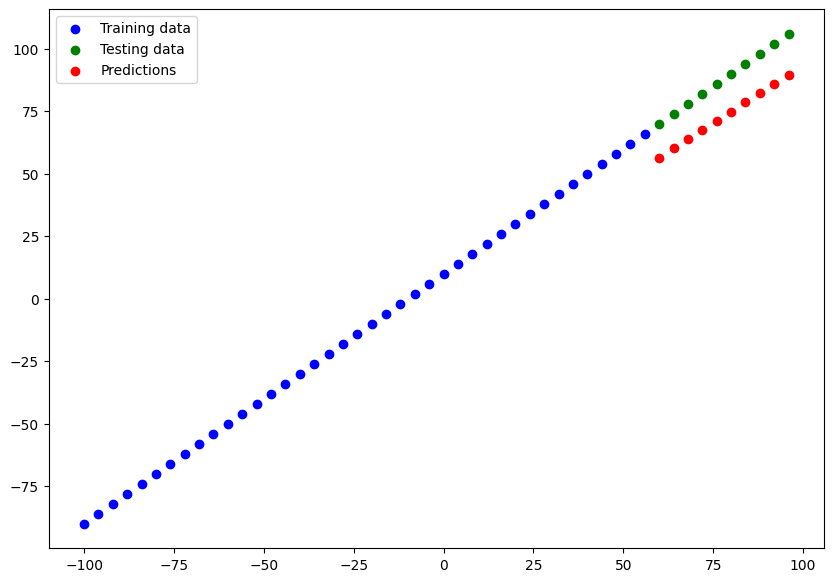

In [40]:
# Make and plot predictions for model1
y_pred1 = model1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [41]:
# Calculate model1 evaluation metrics

mae1 = MAE(y_true=y_test, y_pred=y_pred1)
mse1 = MSE(y_true=y_test, y_pred=y_pred1)
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.957848>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.58145>)

In [42]:
# Model2 - 2 layer and 100 epochs

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9067 - mse: 440.5117
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 29.4141 - mse: 1346.3230
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 22.1703 - mse: 736.2714
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 14.1935 - mse: 278.3809
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 20.0077 - mse: 547.0350
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6655 - mse: 105.6114
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 16.4112 - mse: 348.7921
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 16.8263 - mse: 385.8480
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 29.2414 - mse: 1170.4320
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7590 - mse: 236.4497
Epoch 11/100
2/2 [==============================

1/1 [==============================] - 0s 35ms/step


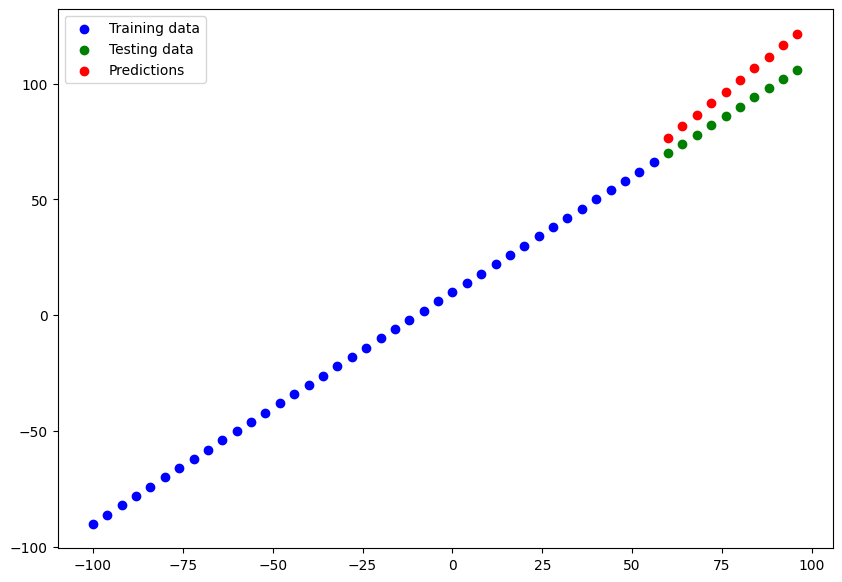

In [43]:
# Make and plot predictions for model2
y_pred2 = model2.predict(X_test)
plot_predictions(predictions=y_pred2)

In [44]:
# Calculate model2 evaluation metrics
mae2 = MAE(y_true=y_test, y_pred=y_pred2)
mse2 = MSE(y_true=y_test, y_pred=y_pred2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.045192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=130.07205>)

In [45]:
# Model3 - 2 layers and 500 epochs
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.6056 - mse: 1063.3955
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.7739 - mse: 795.4139
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 30.8283 - mse: 1394.3618
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 23.7093 - mse: 810.7444
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.1260 - mse: 244.0352
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.2955 - mse: 143.4629
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.3065 - mse: 195.6003
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 10.9193 - mse: 139.4254
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 38.3514 - mse: 2281.5642
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 25.8839 - mse: 941.8246
Epoch 11/500
2/2 [============================

1/1 [==============================] - 0s 36ms/step


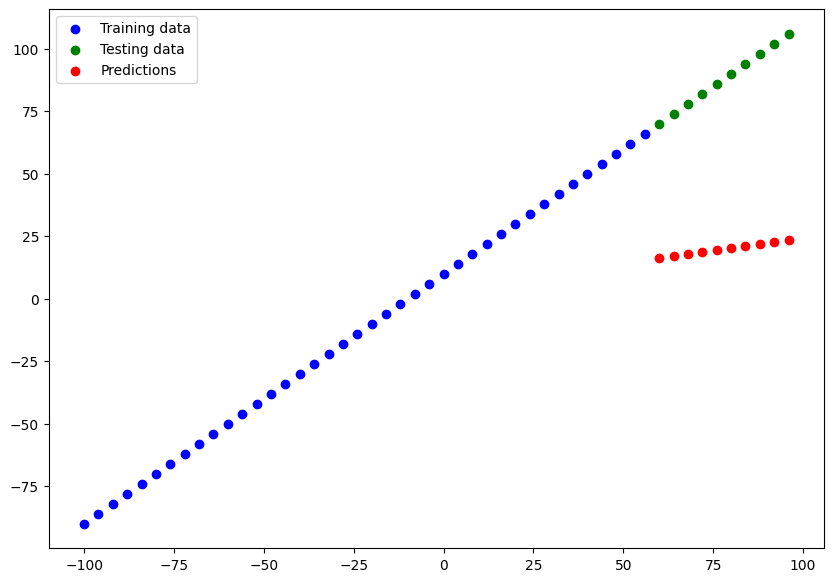

In [46]:
# Make and plot predictions for model2
y_pred3 = model3.predict(X_test)
plot_predictions(predictions=y_pred3)

In [47]:
# Create Evaluation metrics

mae3 = MAE(y_test, y_pred3)
mse3 = MSE(y_test, y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.91821>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4697.2666>)

**NOTE:** Start with small experiments and make sure they work and then increase their scale when necessary.

### Comparing the results of our Experiments

In [48]:
# Let's compare our model results with pandas dataframe

model_results = [["model1", mae1.numpy(), mse1.numpy()],
                ["model2", mae2.numpy(), mse2.numpy()],
                ["model3", mae3.numpy(), mse3.numpy()]]

results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
results

,Model,MAE,MSE
0,model1,14.957848,224.581451
1,model2,11.045192,130.072052
2,model3,67.918213,4697.266602


In [52]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


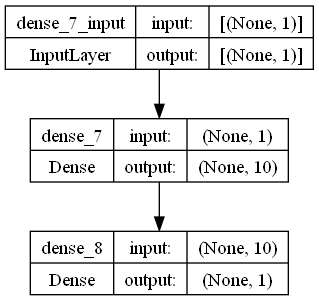

In [53]:
plot_model(model2, show_shapes=True)

**NOTE:** A main goal should be to minimize the time between each experiment.
EXPERIMENT, EXPERIMENT, EXPERIMENT

#### Tracking Model Experiments

To track the results of your experiments:
**Resource:**
- Tensorboard
    * A component of TensorFlow lib, to help track modelling experiments
##
- Weights & Bias
    * A tool for tracking all kinds of ML Experiments(plugs directly into Tensorboard)

#### Saving Models

Format:
- SavedModel Format - A way to serialize models. Restored with load_model
- HDF5 Format - Saved using HDF5 standards. Uses the .h5 
    - Best format when using the model universally

In [59]:
# Save model using SavedModel format
model2.save("Best_Reg_model")

INFO:tensorflow:Assets written to: Best_Reg_model\assets


In [58]:
# Save model using HDF5 format
model2.save("Best_reg_model_hd5f.h5")

#### Load Models

In [57]:
# Load in SavedModel format model
loaded_savedmodel = tf.keras.models.load_model("./Best_Reg_model/")
loaded_savedmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
# compare the model_2 predictions with savedModel format predictions
# The predictions are same

y_pred2 = model2.predict(X_test)
loaded_savedmodel_pred = loaded_savedmodel.predict(X_test)
y_pred2 == loaded_savedmodel_pred

1/1 [==============================] - 0s 17ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
MAE(y_true=y_test, y_pred = y_pred2) == MAE(y_true=y_test, y_pred=loaded_savedmodel_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [62]:
# Load in HDF5 format model
loaded_HDF5_model = tf.keras.models.load_model("Best_reg_model_hd5f.h5")
loaded_HDF5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_pred2 = model2.predict(X_test)
loaded_HDF5_model_pred = loaded_HDF5_model.predict(X_test)
y_pred2 == loaded_HDF5_model_pred

1/1 [==============================] - 0s 40ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])